
### **Tasks to Perform**

- **Understand the Problem and Setup**: Define objectives, install / import required libraries, and set up the environment for the task.

- **Load and Inspect Data**: Load datasets, inspect their structure, and understand the data's format, columns, and types.

- **Clean the Data**: Handle missing, duplicate, or inconsistent values, correct data types.

- **Conduct Exploratory Data Analysis (EDA)**: Summarize data with statistical and visual tools like histograms, heatmaps, and pair plots to explore patterns and relationships.

- **Train Models**: Select and train appropriate machine learning models for the task (KNN Algorithm).

- **Optimize and Interpret**: Find Optimal K value and fit the model with new K value.

- **Report and Document**: Notedown the observations / insights found while permforming the implementation.

----

###NOTE
- The steps provided are a general guide and not mandatory; adapt them based on the given problem statement, business case, requirements and data.  
- Focus on understanding the problem and performing only the relevant tasks to achieve the objective efficiently.

## Problem Statement
- The objective of this problem is to develop a classification model to predict whether a breast tumor is benign or malignant based on features extracted from a fine needle aspirate of a breast mass.

- The model will assist medical professionals in making accurate and efficient diagnoses of breast cancer. A correct diagnosis can help determine appropriate treatment plans, potentially saving lives by identifying cancerous tumors early.

## Features in Dataset
The dataset contains the following features to describe each tumor:

- **ID Number**: A unique identifier for each patient record.

- **Clump Thickness**: Represents the thickness of the cell clumps, scored from 1 to 10, where higher scores indicate thicker clumps.

- **Uniformity of Cell Size**: Measures the uniformity in the size of cells, with a score from 1 (uniform) to 10 (non-uniform), with higher scores indicating more variability.

- **Uniformity of Cell Shape**: Reflects the consistency in cell shape, scored from 1 to 10, where higher scores indicate more irregular shapes.

- **Marginal Adhesion**: Indicates the degree to which cells stick to each other, rated from 1 (least adhesive) to 10 (most adhesive). More adhesive cells may be associated with malignant tumors.

- **Single Epithelial Cell Size**: Measures the size of individual epithelial cells, scored from 1 to 10. Larger cells may indicate abnormal cell growth.

- **Bare Nuclei**: Refers to cells with bare nuclei, scored from 1 to 10. Missing values in this feature are common, as not all cells have visible nuclei.

- **Bland Chromatin**: Measures the texture of chromatin in the cells, with scores ranging from 1 (fine) to 10 (coarse). Malignant cells tend to have coarser chromatin.

- **Normal Nucleoli**: Scored from 1 to 10, this feature indicates the presence and size of nucleoli in the cells, with higher values indicating more prominent nucleoli, which can be a sign of malignancy.

- **Mitoses**: The count of cell divisions, scored from 1 to 10, with higher values suggesting more active cell division, which is typically associated with malignant tumors.

- **Class**: It is a target variable and indicates whether the tumor is benign or malignant.

- The diagnostic result:
  - 2 = benign (Non-cancerous tumor)
  - 4 = malignant (Cancerous tumor)

## Output Format :  
- The final answer should be a dataframe predictions on the `test_data`(provided to you).
- It should consist of two columns, (ID and Class). Here, class is your prediction.

Sample Output:

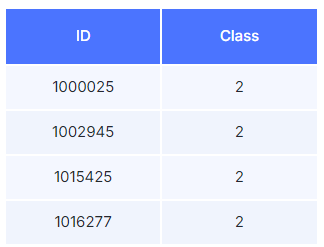

## Evaluation Metric
You need to evaluate your submission using the `score` method.

The evaluation will compare your predicted class labels with the true class labels from the test set, and will be computed as the percentage of correct predictions.

## Completion Criteria
Your submission will be marked as completed if you achieve an matched score more than 65%.

This means that at least 65% of your predictions should be correct.  (where your predicted file will be compared with our true values.)

## Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np

## Load Data
- Do not modify the given code. Execute the below code cells sequencially so get the data.1

In [ ]:
# Load Data
!wget https://new-assets.ccbp.in/frontend/content/aiml/classical-ml/Breast_cancer_test_data.csv
!wget https://new-assets.ccbp.in/frontend/content/aiml/classical-ml/Breast_Cancer_Wisconsin_Dataset.csv

In [ ]:
train_data = pd.read_csv('Breast_Cancer_Wisconsin_Dataset.csv')
test_data = pd.read_csv('Breast_cancer_test_data.csv')

In [ ]:
train_data.head()

In [ ]:
test_data.head()

## Implementation
- Write the code in the below code cell. Create new code cells if required.
- Build the KNN model on the provided `train_data` import and use the appropriate libraries required for building the model.
- Evaluate the model on `test_data` and get the predictions
- Create a dataframe for test_predictions as `submission_df`

In [2]:
# ADD YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd
# Load Data
import requests
urls = [
    "https://new-assets.ccbp.in/frontend/content/aiml/classical-ml/Breast_cancer_test_data.csv",
    "https://new-assets.ccbp.in/frontend/content/aiml/classical-ml/Breast_Cancer_Wisconsin_Dataset.csv"
]   
for url in urls:
    filename = url.split("/")[-1]  # get file name from url
    response = requests.get(url)
    with open(filename, "wb") as f:
        f.write(response.content) 
train_data = pd.read_csv('Breast_Cancer_Wisconsin_Dataset.csv')
test_data = pd.read_csv('Breast_cancer_test_data.csv')
model=KNeighborsClassifier(n_neighbors=5,metric="euclidean")
Features=train_data.drop('Class',axis=1)
TargetVal=train_data['Class']
Features.shape
model.fit(Features,TargetVal)
model.score(Features,TargetVal)












0.7240143369175627

## Predict on Test data

In [3]:
# Predict on the test data
submission_df=model.predict(test_data)
submission_df

array([4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2,
       4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2])

In [4]:

submission_df=pd.DataFrame({'ID':test_data['ID'],'Class':test_predictions})
submission_df

,ID,Class
0,76389,4
1,142932,4
2,183913,4
3,255644,4
4,263538,4
...,...,...
76,1318169,2
77,1324681,2
78,1368273,2
79,1369821,2


## Your Final Submission
### Instructions  

1. **Write Your Solution in the Provided Code Cell**  
   - Use the code cell provided below for your final solution.  
   - **Do not delete** this code cell or create a new one.  

2. **Avoid Creating New Cells**  
   - If you delete the provided code cell and create a new one to write your code, it will not be evaluated.  
   - In such cases, you will need to create a new copy of the notebook from the platform and re-write your code.  

3. **Follow a Step-by-Step Approach**  
   - Merge your solution step-by-step in the provided code cell:  
     - Start by importing the required libraries.  
     - Load the data.  
     - Perform data pre-processing.  
     - Split the data into training and testing sets.  
     - Build the model.  
     - Evaluate the model.  
   - Ensure the steps are followed in a proper sequence for clarity and correctness.

In [ ]:
# write your final code here as per the instructions# write your final code here as per the instructions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd
# Load Data
import requests

urls = [
    "https://new-assets.ccbp.in/frontend/content/aiml/classical-ml/Breast_cancer_test_data.csv",
    "https://new-assets.ccbp.in/frontend/content/aiml/classical-ml/Breast_Cancer_Wisconsin_Dataset.csv"
]

for url in urls:
    filename = url.split("/")[-1]  # get file name from url
    response = requests.get(url)
    with open(filename, "wb") as f:
        f.write(response.content) 
train_data = pd.read_csv('Breast_Cancer_Wisconsin_Dataset.csv')
test_data = pd.read_csv('Breast_cancer_test_data.csv')


model=KNeighborsClassifier(n_neighbors=2,metric="euclidean")
Features=train_data.drop('Class',axis=1)
TargetVal=train_data['Class']
Features.shape
model.fit(Features,TargetVal)
model.score(Features,TargetVal)
test_predictions=model.predict(test_data)
submission_df = pd.DataFrame({
    'ID': test_data['ID'],
    'Class': test_predictions
})
model.score(Features,TargetVal)

0.7813620071684588